In [2]:
import numpy as np
import matplotlib.pyplot as plt

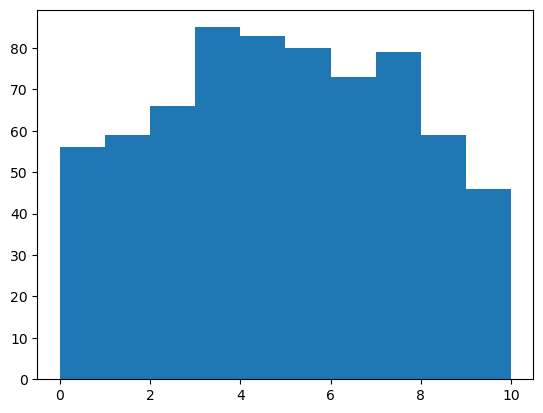

In [4]:
#gaussion accept-reject algorithm
def gaussian_AR(N=1000, mean=5, width=2):
    points = np.linspace(0,10,N)
    #we will add the successful points to kept, which starts as an empty list
    #note that we cannot simply define using np.zeros
    kept = []
    for i in range(len(points)):
        #gaussian presented without normalization so that the max is 1, does not affect resultant distribution
        y = np.exp(-(points[i]-mean)**2/(2*width**2))
        #if a number comes in below the associated gaussian, we count it. If not, we don't.
        if np.random.randn() < y:
            kept.append(points[i])
        else:
            continue
    
    return kept

plt.hist(gaussian_AR())
plt.show()

In [7]:
#Now for the estimation of pi via Monte Carlo:

def pi_estimate(N=1000):
    #using 1000 points in (0,1), (0,1) so
    points = np.random.rand(N,2)
    kept = []
    #number within circle of radius 1/2 -> calculate distances
    for i in range(1000):
        if (points[i,0]-1/2)**2+(points[i,1]-1/2)**2<=1/4:
            kept.append(1)

    N_kept = sum(kept)
    pi_est = 4*N_kept/N
    return pi_est
print(pi_estimate())

3.136


Mean: 3.1392 Variance: 0.003576960000000006


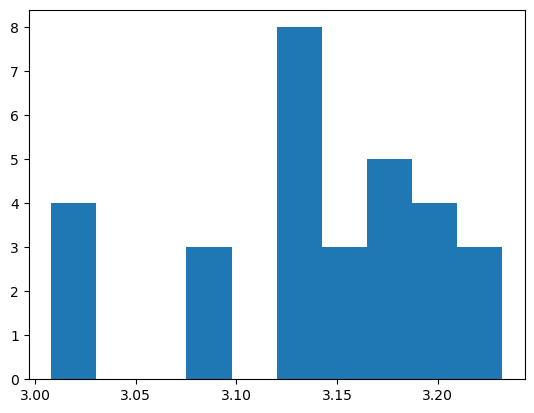

In [12]:
#We now estimate the uncertainty of these guesses themselves:

def pi_est_q(n=30):
    pi_ests = []
    for i in range(n):
        pi_ests.append(pi_estimate())

    mean = sum(pi_ests)/len(pi_ests)
    var = sum((pi_ests-mean*np.ones(n))**2)/(n)

    return pi_ests, mean, var

graph1, mean1, var1 = pi_est_q()
plt.hist(graph1)
print('Mean:',mean1,'Variance:',var1)

Mean: 3.1463600000000014 Variance: 0.0026064304000000048


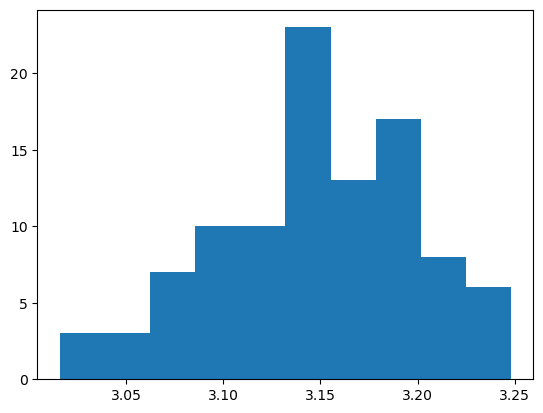

In [13]:
graph2, mean2, var2 = pi_est_q(100)
plt.hist(graph2)
print('Mean:',mean2,'Variance:',var2)

In [ ]:
#So increasing did marginally improve our (already low) variance